In [20]:
#Import the required packages with their customary aliases
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
with sns.color_palette("husl", 8):
    import gmplot
from shapely.geometry import Point
import geopandas as gpd
from mpl_toolkits.basemap import Basemap
import folium
from folium import Map, Marker, GeoJson
from geopandas import GeoDataFrame
pd.set_option('display.max_columns', 104)
sns.set(color_codes=True)
#Use the %matplotlib inline command so that your plots show in the notebook without having to call plt.show() every time
%matplotlib inline

In [4]:
energy_consumption_combine_df5 = pd.read_csv('energy_consumption_combine_df5.csv')

In [5]:
energy_consumption_combine_df5.head()

,year,month,zip_code,customer_type,monthly_usage,lat,lng,geometry
0,2015.0,8,37204.0,commercial,6517747.0,36.109305,-86.776748,POINT (-86.776748 36.109305)
1,2015.0,8,37242.0,commercial,398400.0,36.165017,-86.782171,POINT (-86.78217100000001 36.165017)
2,2015.0,8,37210.0,commercial,10749731.0,36.140869,-86.738847,POINT (-86.73884700000001 36.140869)
3,2015.0,8,37214.0,commercial,1656933.0,36.168995,-86.667231,POINT (-86.667231 36.168995)
4,2015.0,8,37205.0,commercial,9106796.0,36.112469,-86.867263,POINT (-86.86726299999999 36.112469)


In [6]:
energy_consumption_combine_df5['customer_type'].value_counts()

commercial          7146
residential         3517
outdoor_lighting    2387
seasonal             404
Name: customer_type, dtype: int64

Percentage commercial          0.531143
residential         0.261409
outdoor_lighting    0.177419
seasonal            0.030028
Name: customer_type, dtype: float64


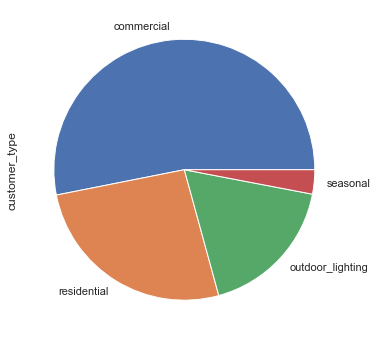

In [9]:
plt.rcParams['figure.figsize'] = (16,6)
print('Percentage',energy_consumption_combine_df5.customer_type.value_counts(normalize=True))
energy_consumption_combine_df5.customer_type.value_counts(normalize=True).plot(kind='pie')

Percentage commercial          0.531143
residential         0.261409
outdoor_lighting    0.177419
seasonal            0.030028
Name: customer_type, dtype: float64


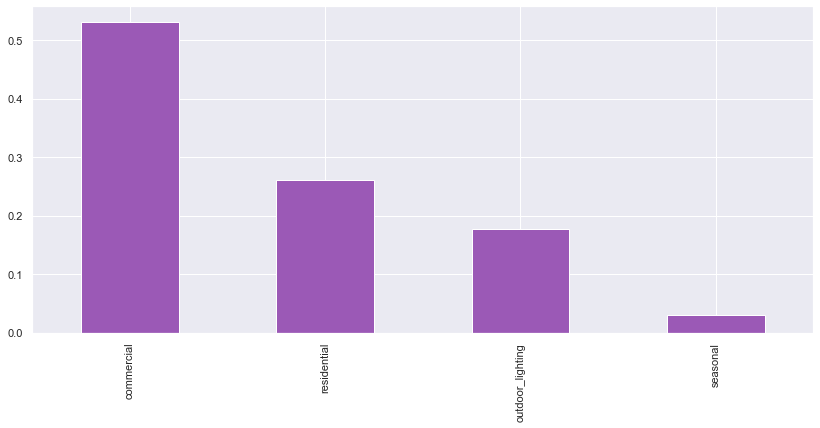

In [27]:
plt.rcParams['figure.figsize'] = (14,6)
# Create an array with the colors you want to use
colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
print('Percentage',energy_consumption_combine_df5.customer_type.value_counts(normalize=True))
energy_consumption_combine_df5.customer_type.value_counts(normalize=True).plot(kind='bar')


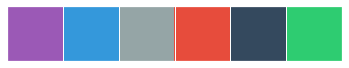

In [28]:
sns.palplot(sns.color_palette())

In [29]:
energy_consumption_combine_df5['month'].value_counts()

7     1243
1     1239
8     1237
5     1234
6     1226
4     1090
9     1087
12    1084
11    1084
2     1078
10     935
3      917
Name: month, dtype: int64

Parcentage 7     0.092389
1     0.092092
8     0.091943
5     0.091720
6     0.091125
4     0.081017
9     0.080794
12    0.080571
11    0.080571
2     0.080125
10    0.069496
3     0.068158
Name: month, dtype: float64


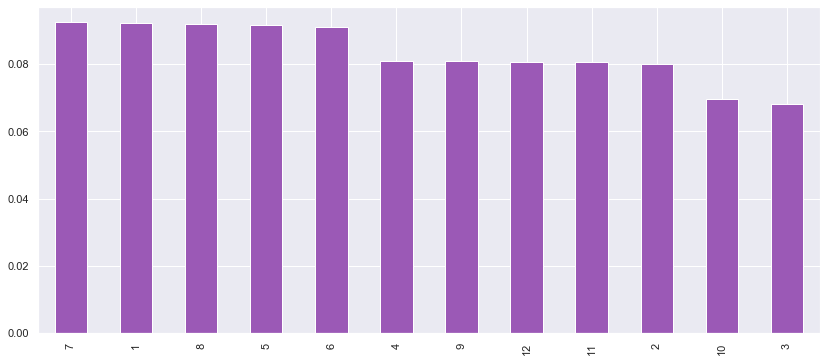

In [92]:
print('Parcentage',energy_consumption_combine_df5.month.value_counts(normalize=True))
energy_consumption_combine_df5.month.value_counts(normalize=True).plot(kind='bar')
palette = sns.color_palette("bright")

In [101]:
color_brewer = ['#41B5A3','#FFAF87','#FF8E72','#ED6A5E','#377771','#E89005','#C6000D','#000000','#05668D','#028090','#9FD35C',
                '#02C39A','#F0F3BD','#41B5A3','#FF6F59','#254441','#B2B09B','#EF3054','#9D9CE8','#0F4777','#5F67DD','#235077','#CCE4F9','#1748D1',
                '#8BB3D6','#467196','#F2C4A2','#F2B1A4','#C42746','#330C25']
fig = {
  "data": [
    {
      "values": fig,(axis1, axis2)= plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='Topic', data=energy_consumption_combine_df5, ax=axis1)
sns.countplot(x='NationalITy', data=energy_consumption_combine_df5, ax=axis2)["month"].value_counts().values,
      "labels": energy_consumption_combine_df5["month"].value_counts().index,
      "domain": {"x": [0, .95]},
      "name": "month Parcentage",
      "hoverinfo":"label+percent+name",
      "hole": .7,
      "type": "pie",
      "marker": {"colors": [i for i in reversed(color_brewer)]},
      "textfont": {"color": "#FFFFFF"}
    }],
  "layout": {
        "title":"Months Parcentage",
        "annotations": [
            {
                "font": {
                    "size": 15
                },
                "showarrow": False,
                "text": "Months Parcentage",
                "x": 0.47,
                "y": 0.5
            }
        ]
    }
}
lmplot(fig, filename='donut')

SyntaxError: invalid syntax (<ipython-input-101-4695c9a8d7f5>, line 7)

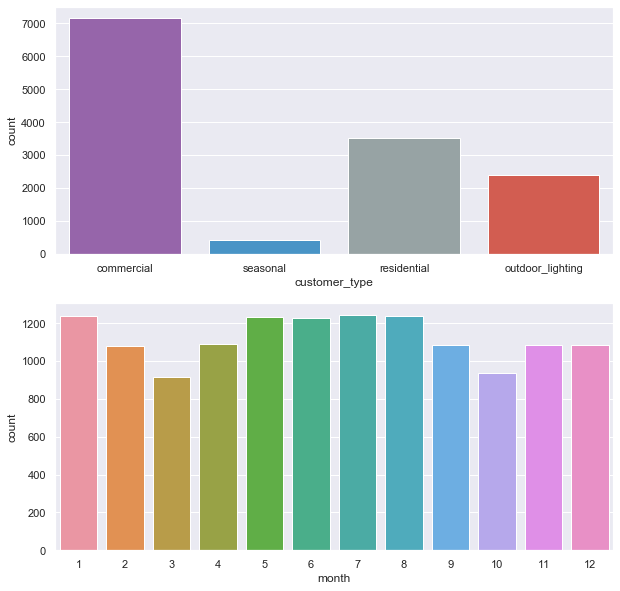

In [40]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='customer_type', data=energy_consumption_combine_df5, ax=axis1)
sns.countplot(x='month', data=energy_consumption_combine_df5, ax=axis2)

No handles with labels found to put in legend.


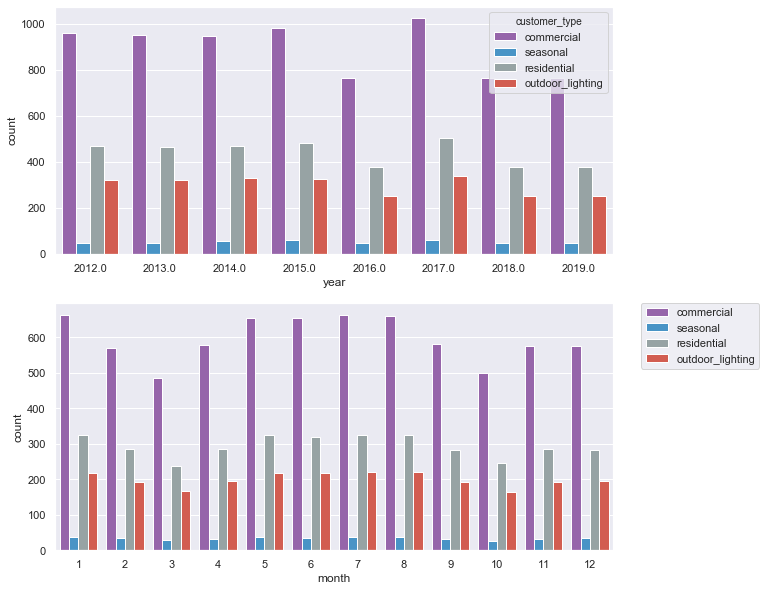

In [91]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='year', hue='customer_type', data=energy_consumption_combine_df5, ax=axis1)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
sns.countplot(x='month', hue='customer_type', data=energy_consumption_combine_df5, ax=axis2)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

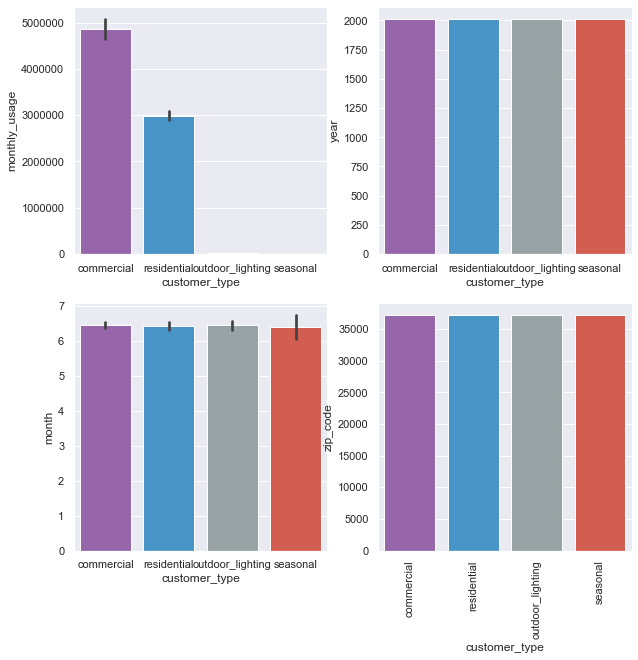

In [44]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='customer_type', y='monthly_usage', data=energy_consumption_combine_df5, order=['commercial','residential','outdoor_lighting','seasonal'], ax=axarr[0,0])
plt.xticks(rotation=90)
sns.barplot(x='customer_type', y='year', data=energy_consumption_combine_df5, order=['commercial','residential','outdoor_lighting','seasonal'], ax=axarr[0,1])
plt.xticks(rotation=90)
sns.barplot(x='customer_type', y='month', data=energy_consumption_combine_df5, order=['commercial','residential','outdoor_lighting','seasonal'], ax=axarr[1,0])
plt.xticks(rotation=90)
sns.barplot(x='customer_type', y='zip_code', data=energy_consumption_combine_df5, order=['commercial','residential','outdoor_lighting','seasonal'], ax=axarr[1,1])
plt.xticks(rotation=90)

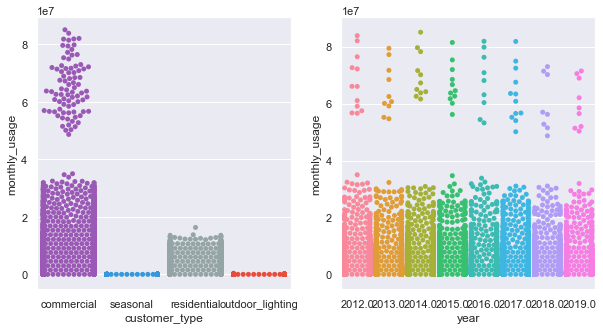

In [47]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.swarmplot(x='customer_type', y='monthly_usage', data=energy_consumption_combine_df5, ax=axis1)
sns.swarmplot(x='year', y='monthly_usage', data=energy_consumption_combine_df5, ax=axis2)


In [48]:
commercial_combine_df = energy_consumption_combine_df5.loc[ energy_consumption_combine_df5.customer_type == 'commercial']
commercial_combine_df.head()

,year,month,zip_code,customer_type,monthly_usage,lat,lng,geometry
0,2015.0,8,37204.0,commercial,6517747.0,36.109305,-86.776748,POINT (-86.776748 36.109305)
1,2015.0,8,37242.0,commercial,398400.0,36.165017,-86.782171,POINT (-86.78217100000001 36.165017)
2,2015.0,8,37210.0,commercial,10749731.0,36.140869,-86.738847,POINT (-86.73884700000001 36.140869)
3,2015.0,8,37214.0,commercial,1656933.0,36.168995,-86.667231,POINT (-86.667231 36.168995)
4,2015.0,8,37205.0,commercial,9106796.0,36.112469,-86.867263,POINT (-86.86726299999999 36.112469)


In [50]:
comm_median_zip_year = commercial_combine_df.groupby(['year', commercial_combine_df['zip_code'], commercial_combine_df['customer_type']]).agg({'monthly_usage':median}).reset_index()

NameError: name 'median' is not defined

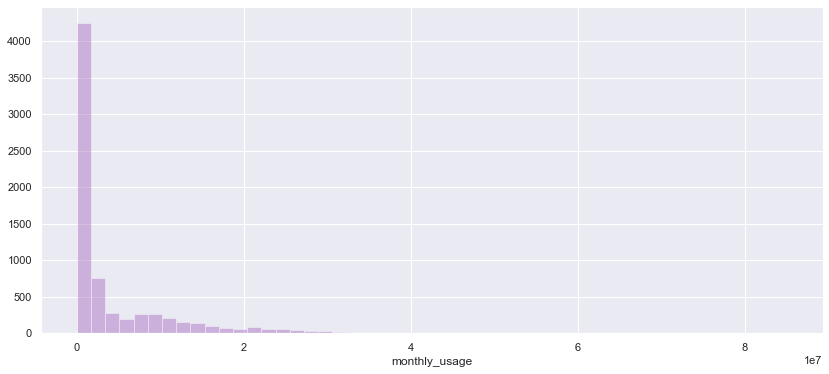

In [52]:
sns.distplot(commercial_combine_df['monthly_usage'], kde=False)

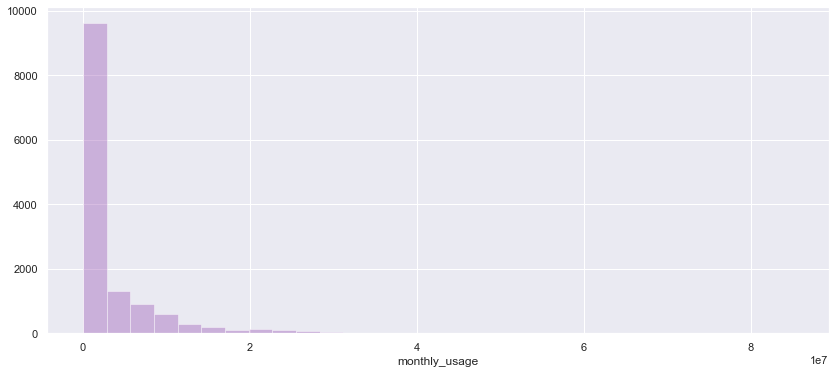

In [62]:
sns.distplot(energy_consumption_combine_df5['monthly_usage'], kde=False, bins=30)

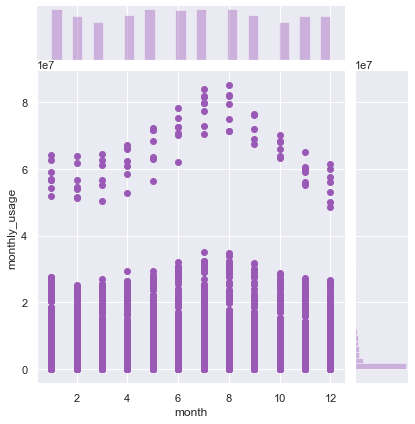

In [70]:
sns.jointplot(x='month', y='monthly_usage', data=energy_consumption_combine_df5)

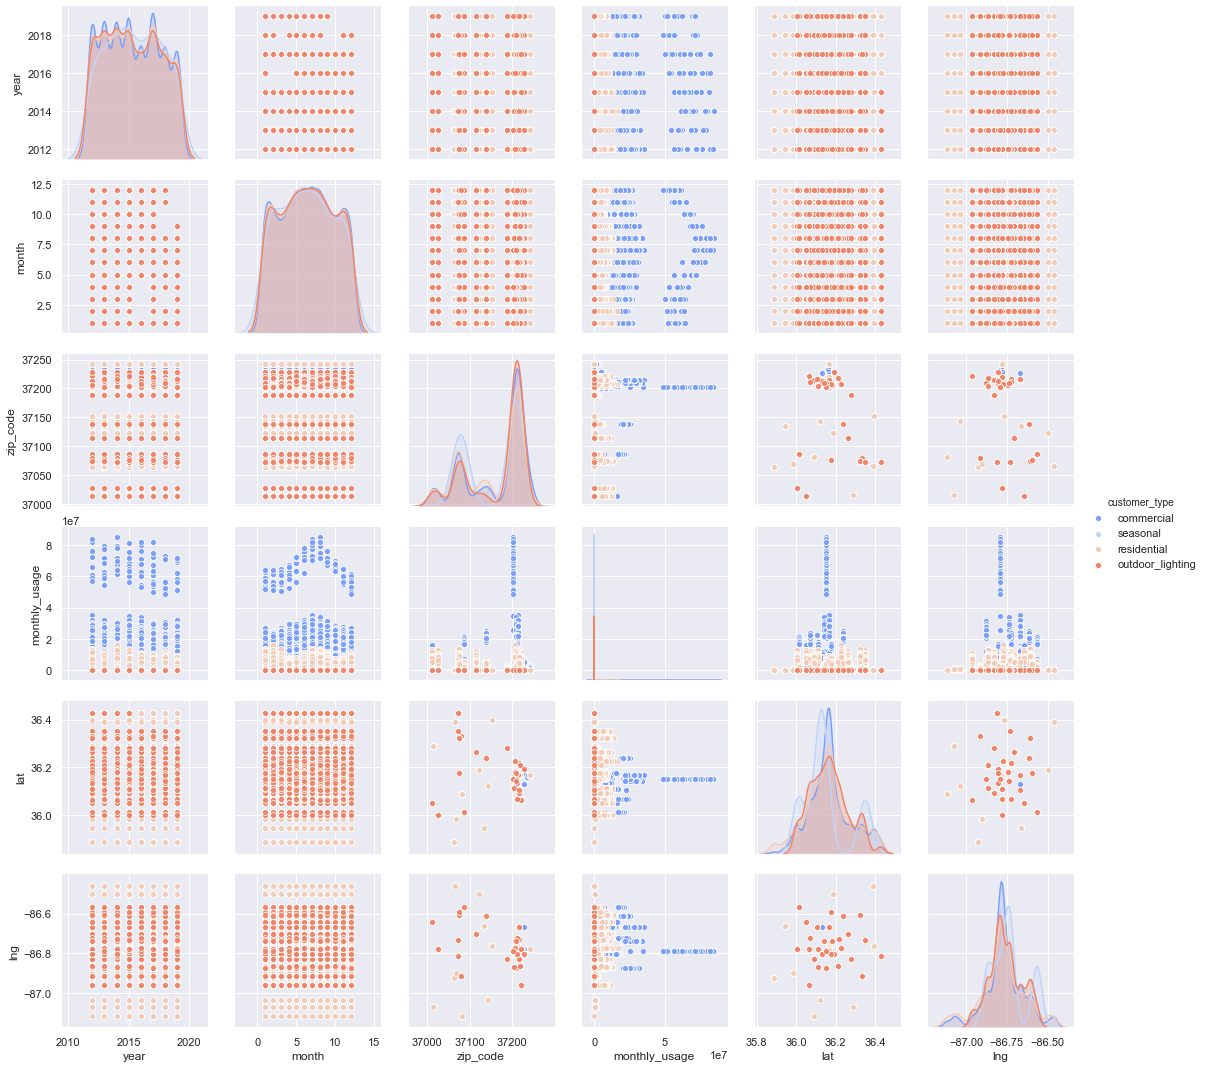

In [72]:
sns.pairplot(energy_consumption_combine_df5, hue='customer_type', palette='coolwarm')

In [75]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 

In [82]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        reversescale = True,
        locations = energy_consumption_combine_df5['zip_code'],
        locationmode = "country names",
        z = energy_consumption_combine_df5['monthly_usage'],
        text = energy_consumption_combine_df5['zip_code'],
        colorbar = {'title' : 'Power Consumption KWH'},
      ) 

layout = dict(title = '2012-2019 Power Consumption KWH',
                geo = dict(showframe = False,projection = {'type':'mercator'})
             )

In [83]:
choromap = go.Figure(data = [data],layout = layout)
plot(choromap,validate=False)

'temp-plot.html'

In [85]:
# top 5 zip code with the highest energy consumption
energy_consumption_combine_df5['zip_code'].value_counts().head(5)

37086.0    423
37210.0    419
37205.0    418
37072.0    411
37212.0    405
Name: zip_code, dtype: int64

In [86]:
# Most Frequent Customer Type
energy_consumption_combine_df5['customer_type'].value_counts().head(5)

commercial          7146
residential         3517
outdoor_lighting    2387
seasonal             404
Name: customer_type, dtype: int64

In [88]:
energy_consumption_combine_df5['zip_code'].nunique()

48